## Laboratorio 4: Decision Lineal

#### Manuel Felipe Pineda

1. Objetivos

- Estudiar los algoritmos de decision para problemas cuya solucion es linealmente separable.

- Analizar el problema de clasificacion lineal desde el algoritmo de mınimos cuadrados.

- Comprender el problema de clasificacion lineal desde el enfoque del analisis de discriminantes.

- Analizar el algoritmo del perceptron como metodo de clasificacion lineal.

Actividades

Partiendo del codigo del ejemplo visto en clase para el algoritmo de minimos cuadrados (ejemplo_mincua.m):

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
from matplotlib import pyplot as plt
from numpy.random import multivariate_normal as mnormal_rd
from scipy.optimize import lsq_linear

The unconstrained solution is optimal.
[ 0.24917486  0.17904653 -0.31758377]


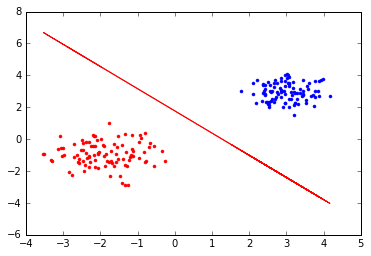

In [2]:
def gen2d(N, mean, var):
    x = mnormal_rd(mean, var * np.eye(len(mean)), N)
    return x
    
    
def gendata(N = 100):
    N = 100
    X1 = np.ones((N, 3))
    X2 = np.ones((N, 3))
    X1[:,:-1] = gen2d(100, [3, 3], 0.3)
    X2[:,:-1] = gen2d(100, [-2, -1], 0.6)
    X = np.vstack((X1, X2))
    b = np.vstack((np.ones((N, 1)),  -1 * np.ones((N, 1))))
    return X, b
    
def min_cua(X, b, out = 0):
    sol = lsq_linear(X, b[:,0])
    print (sol.message)
    z = sol.x
    print (z)
    y = -z[2] / z[1] - (z[0] / z[1]) * X;
    N = (len(X) - out)
    n2 = N // 2 - 1
    plt.plot(X[0:n2,0], X[0:n2,1], '.b')
    plt.plot(X[n2 + 1: N - 1,0], X[n2 + 1: N - 1,1], '.r')
    plt.plot(X[N:,0], X[N:,1], '.g')
    plt.plot(X, y, 'r')
    
X, b = gendata()
min_cua(X, b)
plt.show()

#### 1. Incluya algunos valores atipicos (outliers) en el set de datos dado y evalue el clasificador.

The unconstrained solution is optimal.
[ 0.23366606  0.14786572 -0.32096872]


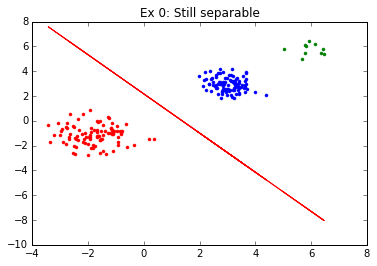

The unconstrained solution is optimal.
[ 0.23733254  0.17281888 -0.23210996]


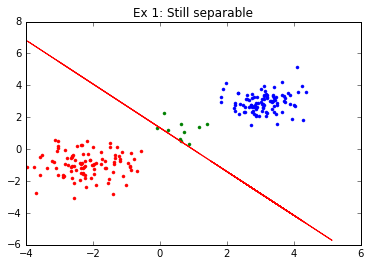

In [3]:
def outliers(mean, message = ''):
    X, b = gendata()
    X3 = np.ones((10, 3))
    X3[:,:-1] = gen2d(10, mean, 0.2)
    X = np.vstack((X, X3))
    b = np.vstack((b, np.ones((10, 1))))
    min_cua(X, b, 10)
    plt.title(message, fontsize= 12)
    plt.show()

outliers([6, 6], 'Ex 0: Still separable')
outliers([0.3, 1.3], 'Ex 1: Still separable')

R: El clasificador se ve sesgado por los outliers causando malas clasificaciones. En el ejemplo 1 aun siguen siendo linealmente separables, pero el clasificador no logra encontrar una buena solucion.

#### 2. Agregue otra dimension al espacio de caracteristicas dado y evalue el clasificador.


In [4]:
def gen3d():
    N = 100
    X1 = np.ones((N, 4))
    X2 = np.ones((N, 4))
    X1[:,:-1] = gen2d(100, [3, 3, 3], 0.3)
    X2[:,:-1] = gen2d(100, [-2, -1, -1], 0.6)
    X = np.vstack((X1, X2))
    b = np.vstack((np.ones((N, 1)),  -1 * np.ones((N, 1))))
    return X, b

def test3d():
    X, b = gen3d()
    sol = lsq_linear(X, b[:,0])
    print (sol.message)
    z = sol.x
    print (z)
    
test3d()

The unconstrained solution is optimal.
[ 0.1857109   0.12104339  0.13145935 -0.35397612]


#### 3. ¿Que conclusiones obtiene al respecto?

- El optimizador sigue siendo optimo para dimensiones mayores

#### 4. Escoja un set de datos (preferiblemente de la base de datos con la que ha trabajado en practicas anteriores) y establezca un problema de clasificacion lineal. Resuelvalo empleando este clasificador.

En este caso se trabajara con el dataset de clasificacion de plantas tipo iris. [link](https://www.kaggle.com/uciml/iris)

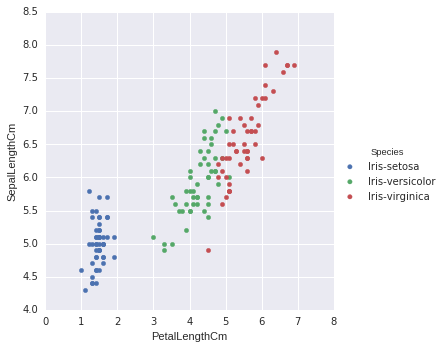

In [5]:
import pandas as pd
import seaborn as sns

iris = pd.read_csv('lab4/iris/Iris.csv')

sns.FacetGrid(iris, hue="Species", size=5).map(plt.scatter, "PetalLengthCm", "SepalLengthCm").add_legend()

Se puede observar que utilizando las caracteristicas "Petal length" y "Sepal Length" se puede clasificar linealmente la especie "iris-setosa" de las otras 2 clases.

The unconstrained solution is optimal.
Final cost 7.8105e+00, first-order optimality 1.82e-12
The unconstrained solution is optimal.
[-0.66396499  0.4137589  -0.25544142]


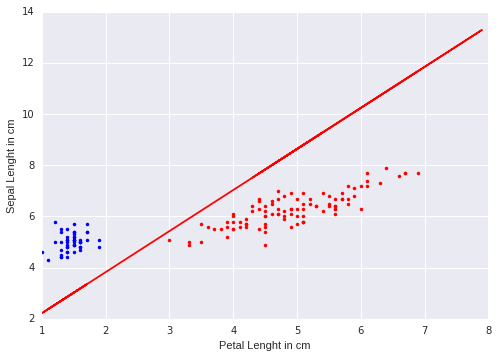

In [6]:
arr = np.array(iris["PetalLengthCm"].values, dtype = np.float64)
columns = arr.shape[0]
arr = np.append(arr, iris["SepalLengthCm"].values, axis=0)
rows = arr.shape[0] // columns
arr = arr.reshape(rows, columns)
arr[0] = np.array(arr[0], dtype = np.float64)

arr = arr.T
N = arr.shape[0] // 3
b = np.vstack((np.ones((N, 1)),  -1 * np.ones((2 * N, 1))))

X = np.ones((3 * N, 3))
X[:,:-1] = arr


def iris_class(X, b):
    sol = lsq_linear(X, b[:,0], lsmr_tol='auto', verbose=1)
    print (sol.message)
    z = sol.x
    print (z)
    y = -z[2] / z[1] - (z[0] / z[1]) * X;

    plt.plot(X[0:49,0], X[0:49,1], '.b')
    plt.plot(X[50:99,0], X[50:99,1], '.r')
    plt.plot(X[100:149,0], X[100:149,1], '.r')    
    plt.plot(X, y, 'r')
    plt.ylabel("Sepal Lenght in cm")
    plt.xlabel("Petal Lenght in cm")
    plt.show()
    
iris_class(X, b)


#### Partiendo del codigo del ejemplo visto en clase para el algoritmo de analisis discriminante (ejemplo_fisher.m):

weights which maximize linear separation:  [-0.07343497 -0.04314487]


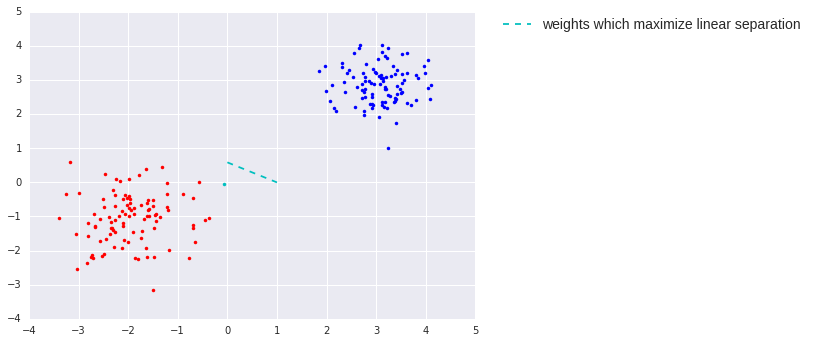

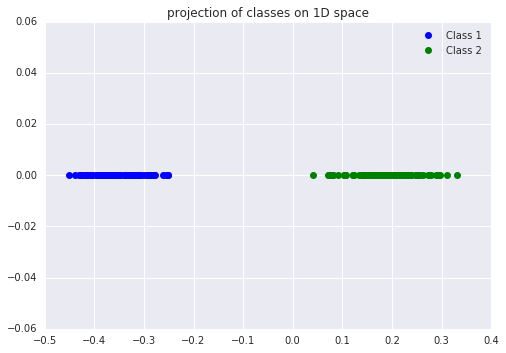

In [7]:

X, b = gendata()
X = X[:,0:2]
n = len(X)
x1 = n // 2 - 1
x2 = n // 2

x = X[0:x1,:]
y = X[x2:n - 1,:]

muX = np.mean(x, axis=0)
muY = np.mean(y, axis=0)
c1 = x - muX
c2 = y - muY

Sw = c1.T.dot(c1) + c2.T.dot(c2)
w = np.linalg.pinv(Sw).dot(muY - muX)

print ('weights which maximize linear separation: ', w)

plt.plot(x[:,0], x[:,1], '.b')
plt.plot(y[:,0], y[:,1], '.r')
plt.plot(w[0], w[1], '.c')
plt.plot((w[1] / w[0], 0), 'c--', label='weights which maximize linear separation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
plt.show()

def plot_proj(x, y, w):
    plt.plot(np.dot(x, w), [0] * x.shape[0], "bo", label="Class 1")
    plt.plot(np.dot(y, w), [0] * y.shape[0], "go", label="Class 2")
    plt.legend()
    plt.title('projection of classes on 1D space')
    plt.show()

#projection of classes on 1D space
plot_proj(x, y, w)

# Des-comentar para verificar los valores de solucion
# print(np.dot(x, w))
# print(np.dot(y, w))

#### 1. Evalue el vector de parametros obtenidos w con datos que esten fuera del set de entrenamiento.

[ 0.10372507  0.23315969 -0.58289922 -1.16579844]


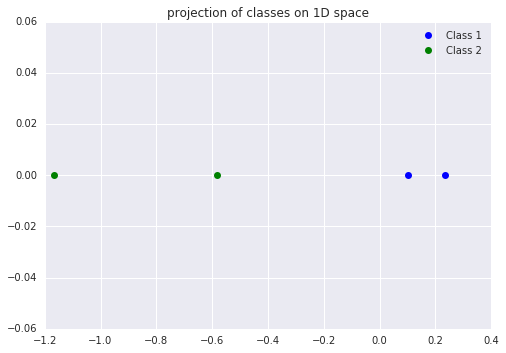

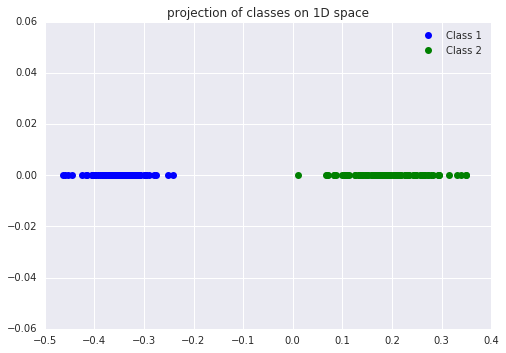

In [8]:
extra = np.array([[-2, 1], [-2, -2], [5, 5], [10, 10]]) # Manually selected points
print (extra.dot(w))

plot_proj(extra[0:2,:], extra[2:,:], w)

X_extra, _ = gendata() # Random points from the original clusters
X_extra = X_extra[:,0:2]
x_extra = X_extra[0:x1,:]
y_extra = X_extra[x2:n - 1,:]
plot_proj(x_extra, y_extra, w)

### Evaluacion de outliers usando el discriminante de fisher

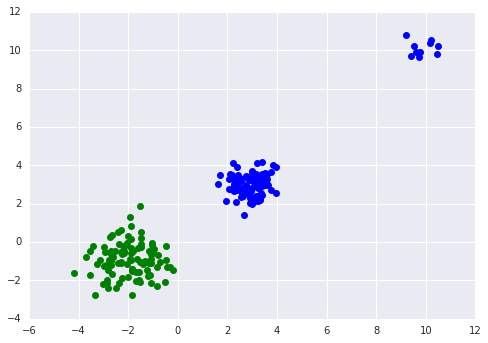

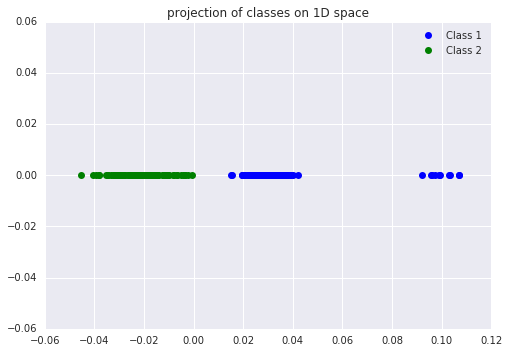

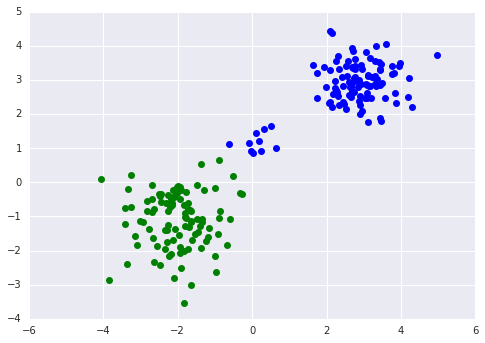

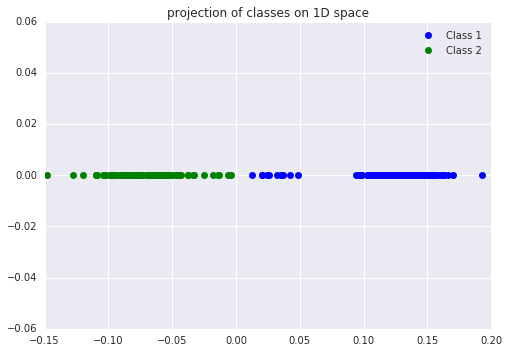

In [9]:
def outliers_fisher(mean, message = ''):
    X, b = gendata()
    X = X[:,0:2]
    X3 = gen2d(10, mean, 0.2)
    X = np.vstack((X3, X))
    len1 = 110
    x = X[0:len1,:]
    y = X[len1:,:]
    mx = np.mean(x, axis=0)
    my = np.mean(y, axis=0)
    c1 = x - mx
    c2 = y - my
    Sw = c1.T.dot(c1) + c2.T.dot(c2)
    w = np.linalg.pinv(Sw).dot(mx - my)
    plt.plot(x[:,0], x[:,1], 'bo')
    plt.plot(y[:,0], y[:,1], 'go')
    plt.show()
    plot_proj(x, y, w)
    
    
outliers_fisher([10, 10])
outliers_fisher([0.3, 1.3])

#### 2. Escoja un set de datos (preferiblemente de la base de datos con la que ha trabajado en practicas anteriores) y establezca un problema de clasificacion lineal. Resuelvalo empleando este clasificador.

weights which maximize linear separation:  [ 0.08500976 -0.052975  ]


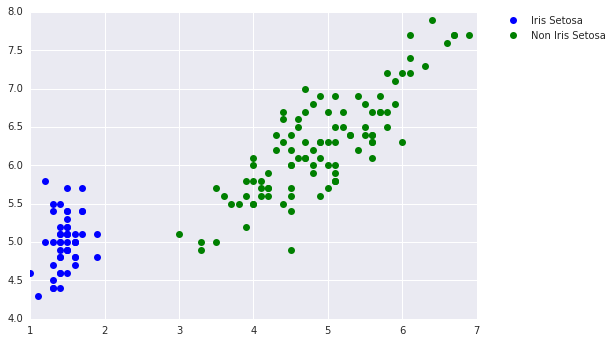

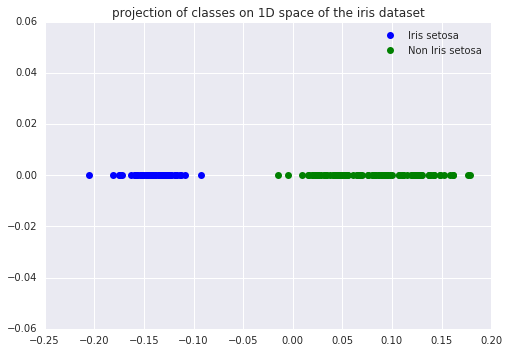

In [10]:
def iris_fisher():
    arr = np.array(iris["PetalLengthCm"].values, dtype = np.float64)
    columns = arr.shape[0]
    arr = np.append(arr, iris["SepalLengthCm"].values, axis=0)
    rows = arr.shape[0] // columns
    arr = arr.reshape(rows, columns)
    arr[0] = np.array(arr[0], dtype = np.float64)
    arr = arr.T
    x = arr[0:50,:]
    y = arr[50:,:]
    mx = np.mean(x, axis=0)
    my = np.mean(y, axis=0)
    Sw = (x - mx).T.dot(x - mx) + (y - my).T.dot(y - my)
    w = np.linalg.pinv(Sw).dot(my - mx)
    print ('weights which maximize linear separation: ', w)
    plt.plot(x[:,0], x[:,1],'bo', label='Iris Setosa')
    plt.plot(y[:,0], y[:,1],'go', label='Non Iris Setosa')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    plt.plot(np.dot(x, w), [0] * x.shape[0], "bo", label="Iris setosa")
    plt.plot(np.dot(y, w), [0] * y.shape[0], "go", label="Non Iris setosa")
    plt.legend()
    plt.title('projection of classes on 1D space of the iris dataset')
    plt.show()
    
iris_fisher()

#### Partiendo del codigo del ejemplo visto en clase para el algoritmo del perceptron (ejemplo_percep.m):

Misclassified 0.00


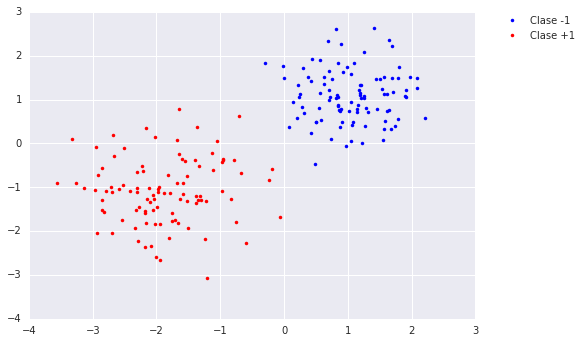

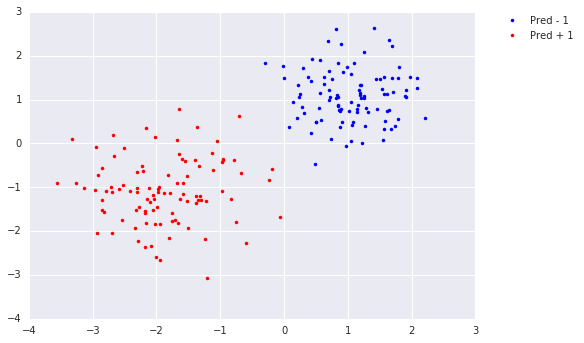

In [11]:
def perceptron(X, Y, w_init, rate=0.1, fun=None, iters=100, stop=None):
    w = w_init
    w_ant = None
    for it in range(0, iters):
        w_ant = w
        for i in range(0, len(X)):
            if (np.sign(w.dot(X[i])) != Y[i]):
                w = w + rate * X[i] * Y[i]
        if (stop):
            if (stop(w, w_ant)):
                break
        
    if (fun):
        fun(X, Y, w)
    return w

X, b = gendata()
n = len(X) // 2
X[0:n,:] -= np.array([2, 2, 0])
w = np.array([100, -1, -1])
eta = 0.1

def print_err(X, Y, w):
    ytag = np.array([w.dot(X[i]) for i in range(len(X))])
    ytag = np.sign(ytag)
    print('Misclassified %.2f' % (100 * np.sum(ytag != Y) / X.shape[0]))
    
wtag = perceptron(X, b[:,0], w, eta, print_err)
ytag = np.array([wtag.dot(X[i]) for i in range(len(X))])

n = len(X) // 2
x = X[0:n,:]
y = X[n:,:]
plt.plot(x[:,0], x[:,1], 'b.', label='Clase -1')
plt.plot(y[:,0], y[:,1], 'r.', label='Clase +1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.plot(X[ytag > 0, 0], X[ytag > 0, 1], 'b.', label='Pred - 1')
plt.plot(X[ytag < 0, 0], X[ytag < 0, 1], 'r.', label='Pred + 1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### 1. Grafique la tasa de error vs. numero de iteraciones.

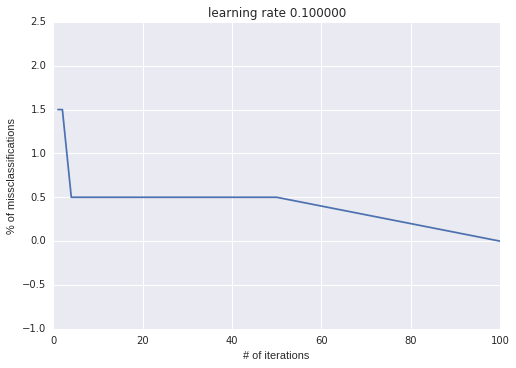

In [12]:
def simulate(w_init, rate):
    it = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100]
    per = []

    def append_err(X, Y, w):
        ytag = np.array([w.dot(X[i]) for i in range(len(X))])
        ytag = np.sign(ytag)
        per.append(100 * (np.sum(ytag != Y) / X.shape[0]))

    for i in it:
        wtag = perceptron(X, b[:,0], w_init, fun=append_err, iters=i, rate=rate)

    plt.plot(it, per)
    plt.ylim((-1, np.amax(per) + 1))
    plt.ylabel('% of missclassifications')
    plt.xlabel('# of iterations')
    plt.title('learning rate %f' % (rate))
    plt.show()

simulate(w, eta)

#### 2. Modifique el algoritmo para que se ejecute mientras no se alcance un criterio.

In [13]:
def stop(w, w_ant):
    if (np.abs(np.sum(w - w_ant)) < 0.1):
        print('Quits by this cool function')
        return True
    return False

wtag = perceptron(X, b[:,0], w, eta, fun=print_err, iters=10000, stop=stop)

Quits by this cool function
Misclassified 0.00


#### 3. Varie los valores de inicializacion del vector w y el valor de la razon de aprendizaje $\eta$. ¿Que puede concluir al respecto?

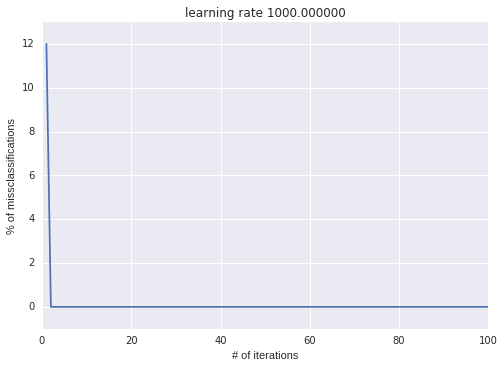

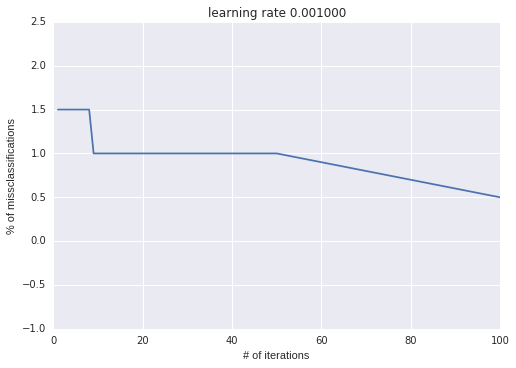

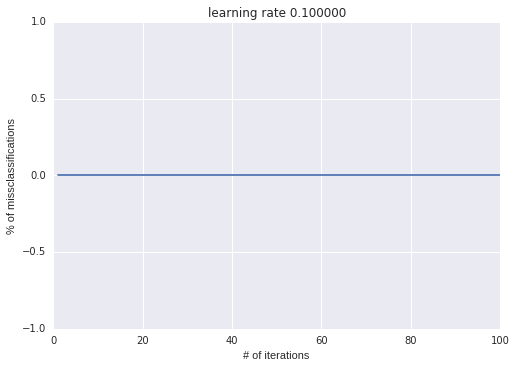

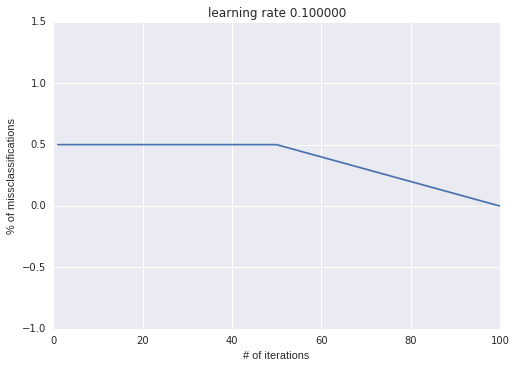

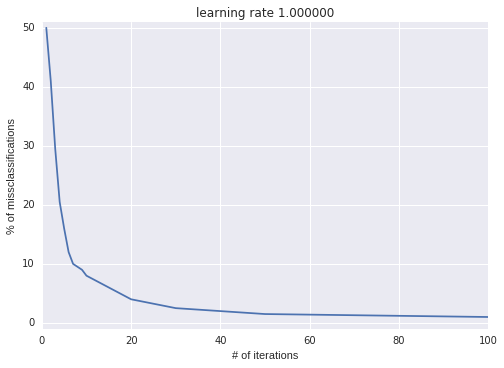

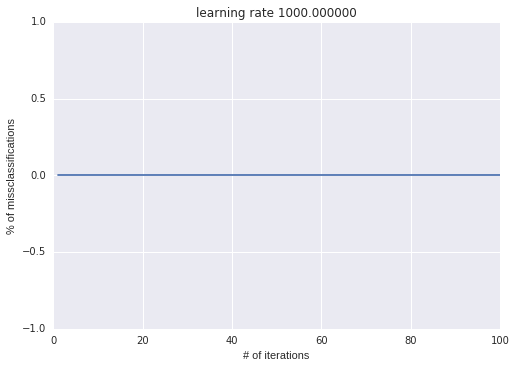

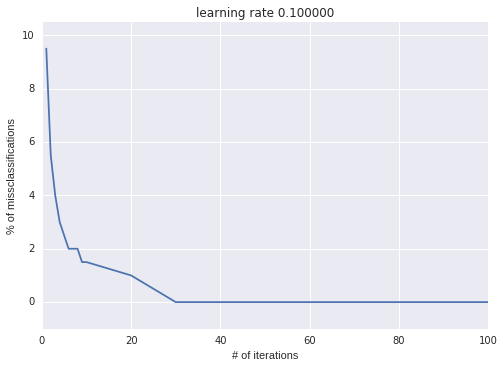

In [14]:
simulate(np.array([0.5, 0.5, 0.5]), rate=1000)
simulate(np.array([0.5, 0.5, 0.5]), rate=0.001)
simulate(np.array([0.5, 0.5, 0.5]), rate=0.1)
simulate(np.array([100, 0.5, 0.5]), rate=0.1)
simulate(np.array([100, 122, -1123]), rate=1)
simulate(np.array([100, 122, -1123]), rate=1000)
simulate(np.array([5, 0, 22]), rate=0.1)

### Discusion

- Durante el laboratorio se hicieron pruebas ubicando outliers en los datasets de manera que siguieran siendo linealmente separables, en el caso de minimos cuadrados se puede ver como esto afecta a las clasificaciones, causando incluso clasificaciones incorrectas. Dicho problema no sucede al usar el metodo discriminante de Fisher, esto se debe a que el metodo de minimos cuadrados se enfoca en hacer el modelo de prediccion lo mas parecido posible al dataset, en contraste, el metodo del discriminante de Fisher se enfoca en maximizar la separacion de las clases en el espacio de salida.

- Bajo los experimentos se puede ver que la modificacion de $\eta$ afecta la convergencia del metodo del perceptron, entre mas pequeno sea, mas tiempo tarda en converger. En ocasiones cuando el valor de $\eta$ es muy grande no permite que el algoritmo converja a una respuesta optima.
